In [5]:
import numpy as np
import pandas as pd

In [6]:
raw_mail_data = pd.read_csv('mail_data.csv')

In [7]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [8]:
# replacing all the not null values with a string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
mail_data['Category'] = encoder.fit_transform(mail_data['Category'])

In [11]:
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
# check for duplicate values
mail_data.duplicated().sum()

415

In [14]:
mail_data = mail_data.drop_duplicates(keep='first')

In [15]:
mail_data.duplicated().sum()

0

In [16]:
mail_data.shape

(5157, 2)

In [17]:
# fnding how many spam(1) and ham(0)
mail_data['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

In [18]:
import matplotlib.pyplot as plt

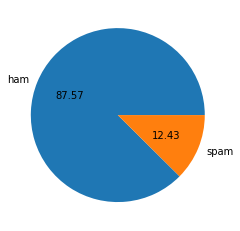

In [19]:
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
mail_data['num_characters'] = mail_data['Message'].apply(len)

In [18]:
mail_data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
mail_data['num_words'] = mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
mail_data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
mail_data['num_sentences'] = mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
mail_data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham
mail_data[mail_data['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# spam
mail_data[mail_data['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

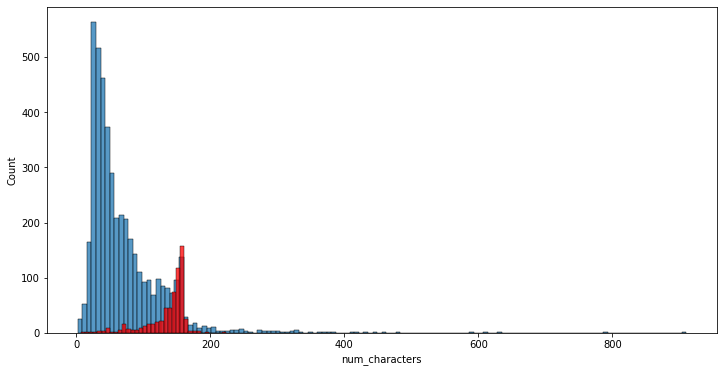

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 0]['num_characters'])
sns.histplot(mail_data[mail_data['Category'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

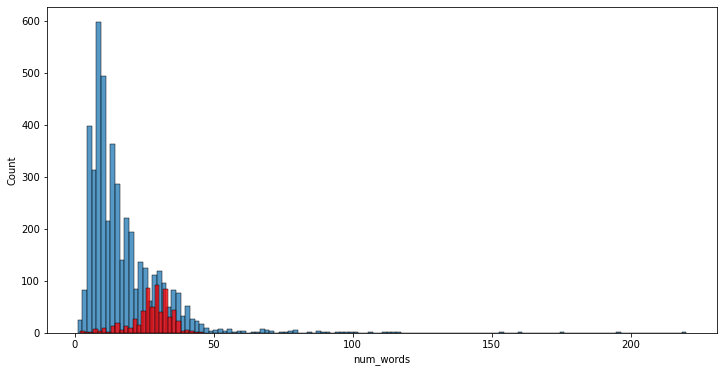

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(mail_data[mail_data['Category'] == 0]['num_words'])
sns.histplot(mail_data[mail_data['Category'] == 1]['num_words'],color='red')

<AxesSubplot:>

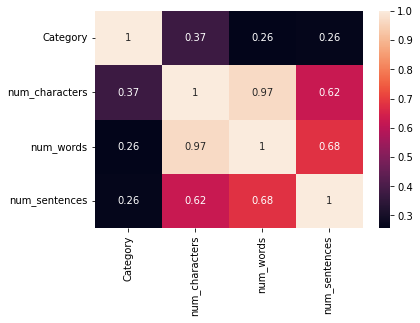

In [29]:
sns.heatmap(mail_data.corr(),annot=True)

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [21]:
#data preprocessing

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
mail_data['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
mail_data['transformed_text'] = mail_data['Message'].apply(transform_text)

In [39]:
mail_data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in mail_data[mail_data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\Rajesh Nayak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'u'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'award'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'c'),
  Text(29, 0, 'guarante')])

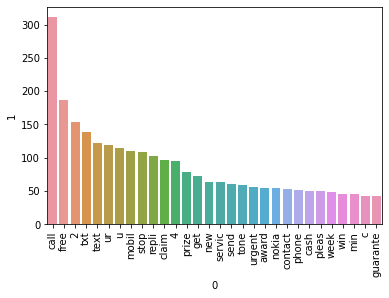

In [41]:
# most common 30 words in spam
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [42]:
ham_corpus = []
for msg in mail_data[mail_data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\Rajesh Nayak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'love'),
  Text(12, 0, 'time'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'ü'),
  Text(19, 0, 'need'),
  Text(20, 0, 'one'),
  Text(21, 0, '4'),
  Text(22, 0, 'lor'),
  Text(23, 0, 'home'),
  Text(24, 0, 'think'),
  Text(25, 0, 'see'),
  Text(26, 0, 'take'),
  Text(27, 0, 'still'),
  Text(28, 0, 'da'),
  Text(29, 0, 'tell')])

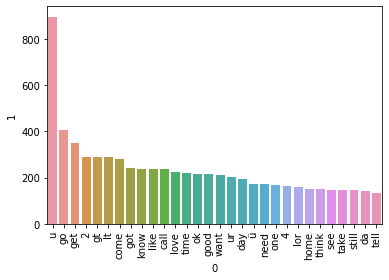

In [43]:
# most common 30 words in ham
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [45]:
X = tfidf.fit_transform(mail_data['transformed_text']).toarray()

In [46]:
X.shape

(5157, 3000)

In [47]:
Y = mail_data['Category'].values

In [48]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# splitting the  data into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [51]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [53]:
#mnb
mnb.fit(X_train,Y_train)
Y_pred1 = mnb.predict(X_test)
print('Accuracy score :',accuracy_score(Y_test,Y_pred1))

Accuracy score : 0.9670542635658915


In [54]:
cf_matrix=confusion_matrix(Y_test,Y_pred1)

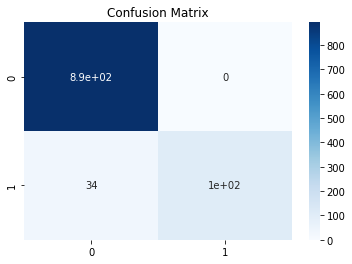

In [55]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'); 

In [56]:
print('precision score :',precision_score(Y_test,Y_pred1))

precision score : 1.0


In [57]:
#gnb
gnb.fit(X_train,Y_train)
Y_pred2 = gnb.predict(X_test)
print('Accuracy score :',accuracy_score(Y_test,Y_pred2))

Accuracy score : 0.8604651162790697


In [58]:
cf_matrix=confusion_matrix(Y_test,Y_pred2)

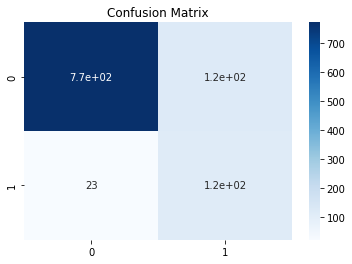

In [59]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'); 

In [60]:
print('precision score :',precision_score(Y_test,Y_pred2))

precision score : 0.48945147679324896


In [61]:
#bnb
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print('Accuracy score :',accuracy_score(Y_test,Y_pred3))

Accuracy score : 0.9757751937984496


In [62]:
cf_matrix=confusion_matrix(Y_test,Y_pred3)

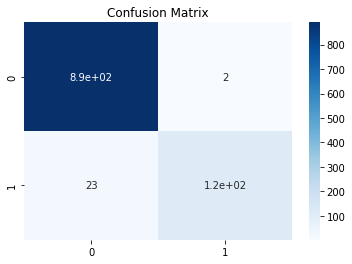

In [63]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,cmap='Blues')
ax.set_title('Confusion Matrix'); 

In [64]:
print('precision score :',precision_score(Y_test,Y_pred3))

precision score : 0.9830508474576272


In [65]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))